## Analyzing the changing pattern and realtionship of road accident and the average temparature of Germany.


### Introduction: 

The correlation between environmental factors and road safety has long been a subject of interest. In this report, I tried to find  the relationship between the average temperature in Germany from 2018 to 2020 and the incidence of accidents on motorways. Understanding this connection could provide valuable insights for developing strategies to enhance road safety and mitigate the impact of adverse weather conditions.

Install the dependencies

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Methods:
## Data Sourses: 
### Datasource 1:Federal Statistical Office of Germany
* Metadata URL 1: https://www.destatis.de/
* Data URL 1: https://www-genesis.destatis.de/genesis/online?language=en&sequenz=statistikTabellen&selectionname=46241#abreadcrumb
* Data Type: CSV
The road accident data in Germany. This data also shows that the accident in Indoor and outdoor as well.


### Datasource 2:climate_environment/CDC/

* Metadata URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/
* Data URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_01.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_02.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_03.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_04.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_05.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_06.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_07.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_08.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_09.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_10.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_11.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_12.txt
* Data Type: txt
* License Type: OpenData License

This is monthly average air temparature in Germany. In this dataset it also shows that the temparature in state wise. 



### Data Pipeline:
The data pipeline involved cleaning and transforming the datasets to make them suitable for analysis. Missing or erroneous entries in the temperature and accident datasets were addressed through imputation and data validation processes. Time alignment was crucial to ensure accurate correlation between temperature and accident data.

### Data Cleaning/Transformation Steps:

Imputation of missing temperature values using interpolation techniques.
Identification and removal of outliers in accident data to prevent skewing of results.
Normalization of data to account for variations in reporting practices.
### Problems Encountered:
One challenge faced during data engineering was the inconsistency in reporting standards for accidents across different regions. Additionally, ensuring a uniform time resolution for both datasets was crucial for meaningful correlation. These challenges were addressed through thorough data validation and cleaning processes.


Load the data: 

In [3]:
# Specify the path to your SQLite database
db_path = r"C:\Users\DCL\made-template-ws2324\FinalDB.sqlite"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Read data from 'AvgTemp' table into a DataFrame
query_avgtemp = "SELECT * FROM AvgTemp"
df_avgtemp = pd.read_sql_query(query_avgtemp, conn)

# Read data from 'AccData' table into a DataFrame
query_accdata = "SELECT * FROM AccData"
df_accdata = pd.read_sql_query(query_accdata, conn)

# Close the database connection
conn.close()

# Print or use the DataFrames as needed
#print("AvgTemp DataFrame:")
#print(df_avgtemp)

#print("\nAccData DataFrame:")
#print(df_accdata)

See the head

In [4]:
df_accdata.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,None,Personal injury accidents,Personal injury accidents,Personal injury accidents,Personal injury accidents,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Other accidents involving intoxication,...,Other accidents involving intoxication,Other accidents involving intoxication,Other accidents involving material damage,Other accidents involving material damage,Other accidents involving material damage,Other accidents involving material damage,Total,Total,Total,Total
1,None,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,...,On motorways/freeways,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total
2,January,13756,5138,1587,20481,3577,1881,1059,6517,924,...,67,1154,132519,37136,10882,180537,150776,44318,13595,208689
3,February,11563,4622,1452,17637,3471,1805,824,6100,854,...,53,1046,124880,30486,10251,165617,140768,37052,12580,190400
4,March,12797,5055,1577,19429,3639,1857,985,6481,995,...,66,1248,141809,33206,11305,186320,159240,40305,13933,213478


In [5]:
df_avgtemp.head()

,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,2018,1,3.31,3.31,4.33,3.14,4.10,2.87,3.90,3.90,4.79,4.75,3.23,5.09,3.30,3.68,3.47,3.20,3.72,None
1,2018,2,-1.64,-1.66,-2.09,-2.96,-1.99,-1.47,-1.02,-1.02,-0.91,-1.40,-0.69,-0.90,-2.75,-1.67,-2.27,-3.05,-1.87,None
2,2018,3,1.40,1.39,3.19,2.24,2.83,0.76,2.62,2.61,3.80,3.55,1.56,3.81,1.32,1.96,1.79,1.58,2.36,None
3,2018,4,12.92,12.90,12.50,12.52,12.63,10.81,12.02,12.01,12.74,12.69,10.04,12.71,12.79,12.84,12.61,12.30,12.32,None
4,2018,5,17.18,17.16,15.23,15.66,15.87,15.76,16.63,16.64,16.30,15.78,15.59,15.97,15.99,16.77,16.14,15.31,16.03,None


In [6]:
temperature_data=pd.DataFrame(df_avgtemp)
temperature_data.head()

,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,2018,1,3.31,3.31,4.33,3.14,4.10,2.87,3.90,3.90,4.79,4.75,3.23,5.09,3.30,3.68,3.47,3.20,3.72,None
1,2018,2,-1.64,-1.66,-2.09,-2.96,-1.99,-1.47,-1.02,-1.02,-0.91,-1.40,-0.69,-0.90,-2.75,-1.67,-2.27,-3.05,-1.87,None
2,2018,3,1.40,1.39,3.19,2.24,2.83,0.76,2.62,2.61,3.80,3.55,1.56,3.81,1.32,1.96,1.79,1.58,2.36,None
3,2018,4,12.92,12.90,12.50,12.52,12.63,10.81,12.02,12.01,12.74,12.69,10.04,12.71,12.79,12.84,12.61,12.30,12.32,None
4,2018,5,17.18,17.16,15.23,15.66,15.87,15.76,16.63,16.64,16.30,15.78,15.59,15.97,15.99,16.77,16.14,15.31,16.03,None


Convert month 1 to january and so on

In [7]:
month_names = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june',
               7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}


In [8]:
temperature_data['date'] = temperature_data['Monat'].map(month_names).astype(str)+'_'+temperature_data['Jahr'].astype(str)

In [9]:
temperature_data.head()

,Jahr,Monat,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,...,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19,date
0,2018,1,3.31,3.31,4.33,3.14,4.10,2.87,3.90,3.90,...,4.75,3.23,5.09,3.30,3.68,3.47,3.20,3.72,None,january_2018
1,2018,2,-1.64,-1.66,-2.09,-2.96,-1.99,-1.47,-1.02,-1.02,...,-1.40,-0.69,-0.90,-2.75,-1.67,-2.27,-3.05,-1.87,None,february_2018
2,2018,3,1.40,1.39,3.19,2.24,2.83,0.76,2.62,2.61,...,3.55,1.56,3.81,1.32,1.96,1.79,1.58,2.36,None,march_2018
3,2018,4,12.92,12.90,12.50,12.52,12.63,10.81,12.02,12.01,...,12.69,10.04,12.71,12.79,12.84,12.61,12.30,12.32,None,april_2018
4,2018,5,17.18,17.16,15.23,15.66,15.87,15.76,16.63,16.64,...,15.78,15.59,15.97,15.99,16.77,16.14,15.31,16.03,None,may_2018


Plot the graph to see the behavior of the data

### Figure 1: 

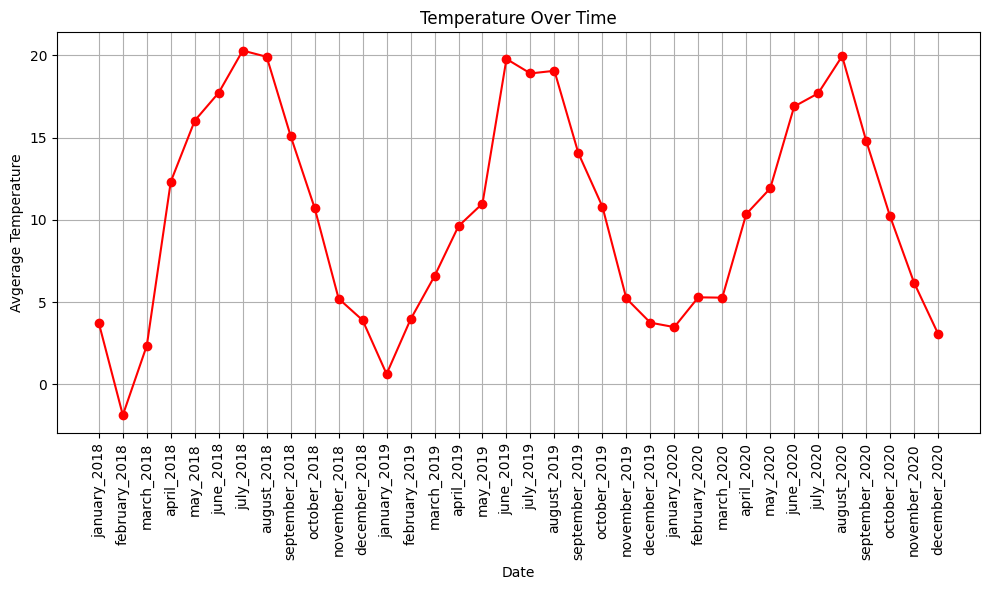

In [10]:
# Plot the behavior of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temperature_data['date'], temperature_data['Deutschland'], marker='o', linestyle='-', color='r')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Now, main plan is to normilized the data so that we can plot the next data into same graph


In [11]:
min_value = temperature_data['Deutschland'].min()
max_value = temperature_data['Deutschland'].max()
temperature_data['total_acc_normalized'] = (temperature_data['Deutschland'] - min_value) / (max_value - min_value)

### Figure 2: (Figure 1 normalized)

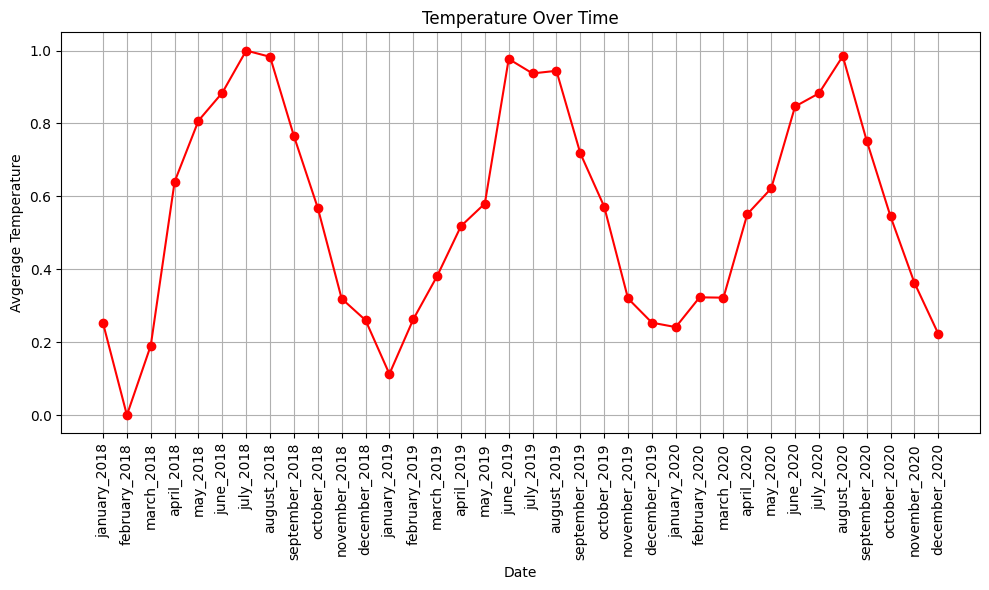

In [12]:
# Plot the behavior of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temperature_data['date'], temperature_data['total_acc_normalized'], marker='o', linestyle='-', color='r')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Figure 3: 

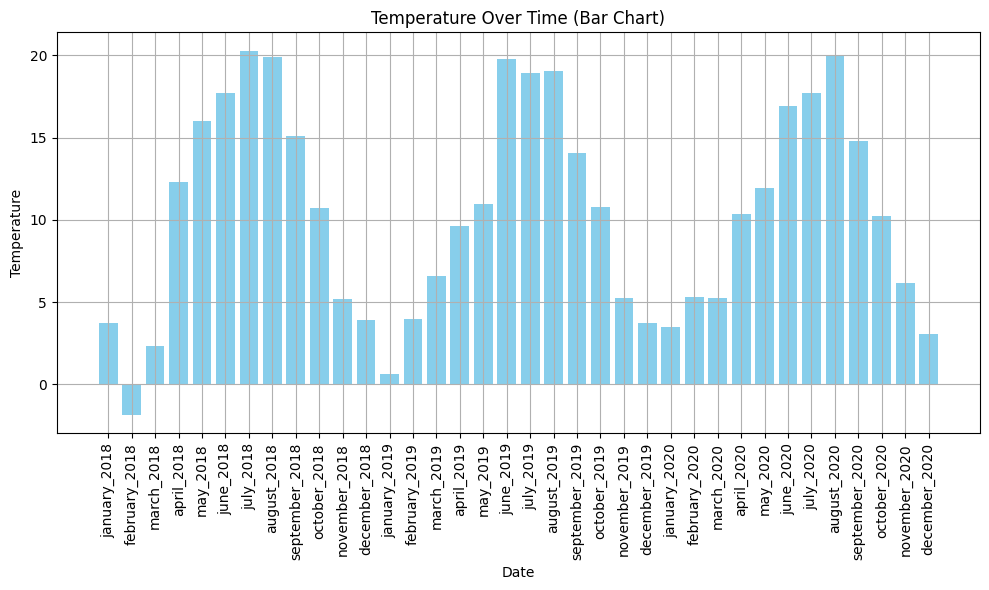

In [13]:
# Plot the behavior of temperature over time using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(temperature_data['date'], temperature_data['Deutschland'], color='skyblue')
plt.title('Temperature Over Time (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.tight_layout()

# Show the bar chart
plt.show()

### Figure 4: 

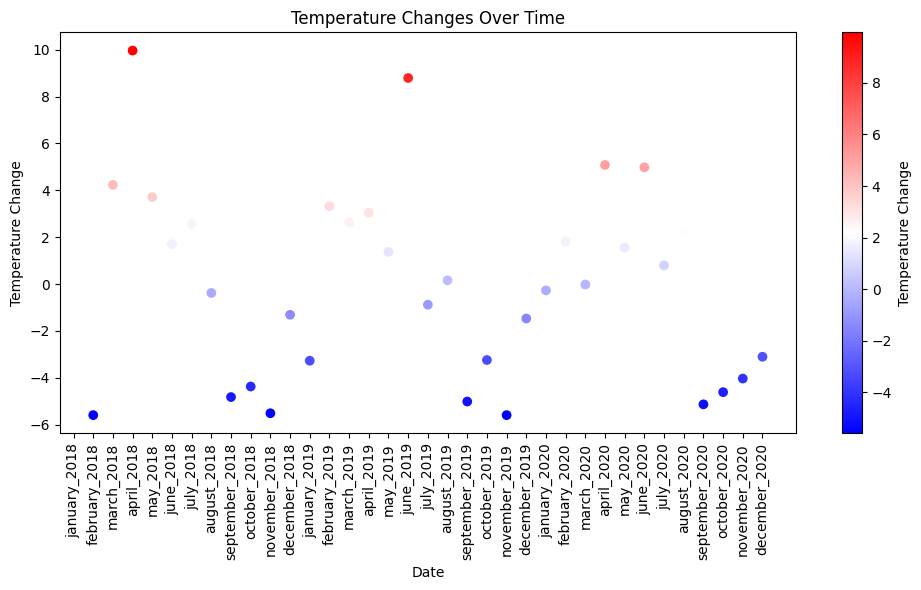

In [14]:
# Plot the changes in temperature over time using a line plot
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Calculate changes in temperature
temperature_data['temperature_change'] = temperature_data['Deutschland'].diff()

# Define a colormap going from blue to red
cmap = LinearSegmentedColormap.from_list('Deutschland', ['blue', 'white', 'red'])

# Normalize the temperature values for colormap mapping
norm = Normalize(vmin=temperature_data['temperature_change'].min(), vmax=temperature_data['temperature_change'].max())

# Plot the changes in temperature over time using a colormap
plt.figure(figsize=(10, 6))
plt.scatter(temperature_data['date'], temperature_data['temperature_change'], c=temperature_data['temperature_change'], cmap=cmap, norm=norm, marker='o')
plt.colorbar(label='Temperature Change')
plt.title('Temperature Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature Change')
plt.xticks(rotation=90)
plt.tight_layout()


In [15]:
df_accdata.values[0]

array([None, 'Personal injury accidents', 'Personal injury accidents',
       'Personal injury accidents', 'Personal injury accidents',
       'Serious acc. invol. mat.damage in the nearer sense',
       'Serious acc. invol. mat.damage in the nearer sense',
       'Serious acc. invol. mat.damage in the nearer sense',
       'Serious acc. invol. mat.damage in the nearer sense',
       'Other accidents involving intoxication',
       'Other accidents involving intoxication',
       'Other accidents involving intoxication',
       'Other accidents involving intoxication',
       'Other accidents involving material damage',
       'Other accidents involving material damage',
       'Other accidents involving material damage',
       'Other accidents involving material damage', 'Total', 'Total',
       'Total', 'Total'], dtype=object)

In [26]:
df_accdata.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,date
0,None,Personal injury accidents,Personal injury accidents,Personal injury accidents,Personal injury accidents,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Serious acc. invol. mat.damage in the nearer s...,Other accidents involving intoxication,...,Other accidents involving intoxication,Other accidents involving material damage,Other accidents involving material damage,Other accidents involving material damage,Other accidents involving material damage,Total,Total,Total,Total,NaN
1,None,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,...,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,Inside built-up areas,Outside built-up areas (excl. motorways/freeways),On motorways/freeways,Total,NaN
2,January,13756,5138,1587,20481,3577,1881,1059,6517,924,...,1154,132519,37136,10882,180537,150776,44318,13595,208689,january_2018
3,February,11563,4622,1452,17637,3471,1805,824,6100,854,...,1046,124880,30486,10251,165617,140768,37052,12580,190400,february_2018
4,March,12797,5055,1577,19429,3639,1857,985,6481,995,...,1248,141809,33206,11305,186320,159240,40305,13933,213478,march_2018


add the year name and month name into a column so that i could be the same as the last data set

In [17]:
df2={'year':[0,0,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]}
df2=pd.DataFrame(df2)
df_accdata['date']=df_accdata.iloc[:,0].str.lower()+'_'+ df2['year'].astype(str)

In [18]:
Acc_data= pd.DataFrame({'date':df_accdata['date'], 'total_acc':df_accdata.iloc[:,19]})

In [19]:
Acc_data = Acc_data.drop(index=[0,1]).reset_index(drop=True)


Found that Total_acc data type is python object type

In [20]:
Acc_data['total_acc'].dtype

dtype('O')

Now I will convert this into int type

In [27]:
Acc_data['total_acc'] = Acc_data['total_acc'].astype(int)
Acc_data['total_acc'].dtype
Acc_data.head()

,date,total_acc,total_acc_normalized
0,january_2018,13595,0.680733
1,february_2018,12580,0.580188
2,march_2018,13933,0.714215
3,april_2018,14747,0.794849
4,may_2018,15389,0.858445


Find the behavior of the data

### Figure 5 :

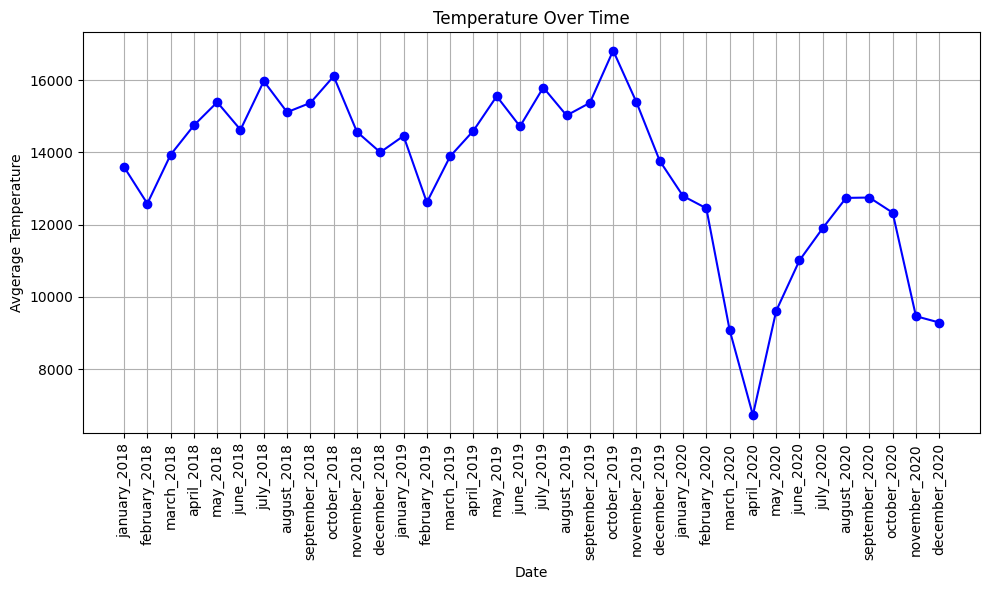

In [22]:
# Plot the behavior of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(Acc_data['date'], Acc_data['total_acc'], marker='o', linestyle='-', color='b')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()


normalizing the data 


In [23]:
min_value = Acc_data['total_acc'].min()
max_value = Acc_data['total_acc'].max()

Acc_data['total_acc_normalized'] = (Acc_data['total_acc'] - min_value) / (max_value - min_value)

### Figure 6: (Figure 5 normalized)

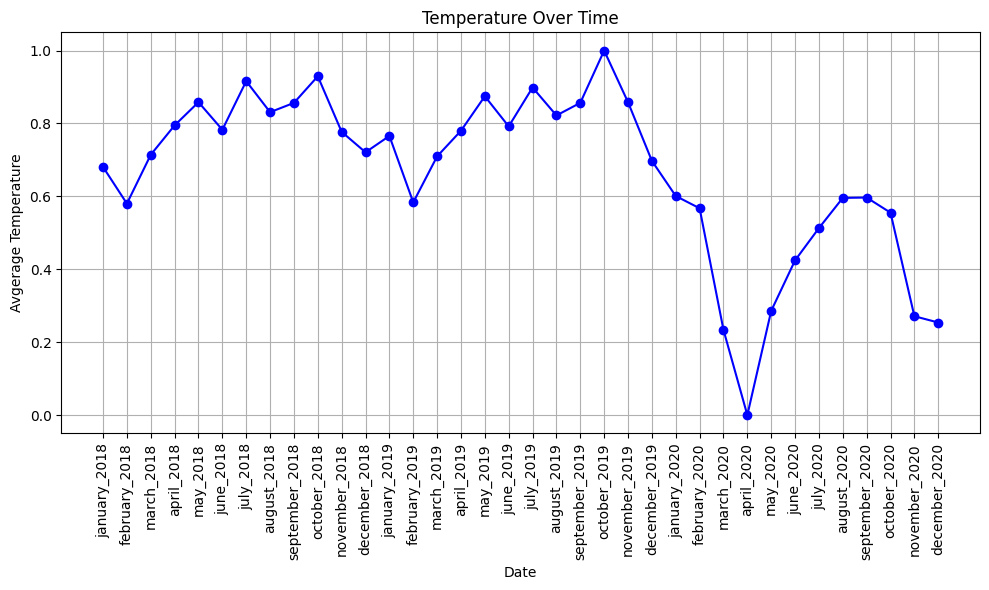

In [24]:
# Plot the behavior of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(Acc_data['date'], Acc_data['total_acc_normalized'], marker='o', linestyle='-', color='b')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

Ploting the data into same graph

### Figure 7: Combined fig 6 and fig 2

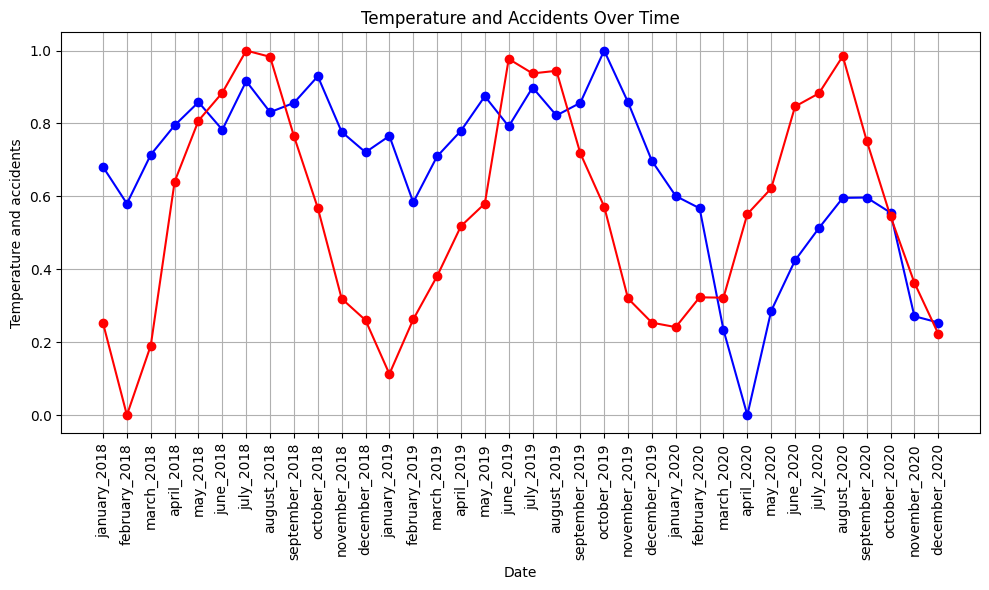

In [25]:
# Plot the behavior of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(Acc_data['date'], Acc_data['total_acc_normalized'], marker='o', linestyle='-', color='b')
plt.plot(temperature_data['date'], temperature_data['total_acc_normalized'], marker='o', linestyle='-', color='r')

plt.title('Temperature and Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature and accidents')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

## Discussion/Conclusion:

### Definition of Results
When examined, there was a significant correlation between high temperatures and traffic accidents. As temperatures increses, the number of accidents correspondingly increased. This correlation indicates a potential link between weather and road safety, suggesting that rising temperatures may pose unique challenges that increase accident rates

### Limitations:
Although the relationship is clear, it is important to acknowledge the limitations of this study. Other factors, such as road maintenance, traffic volume, and driver behavior, can contribute to inappropriate accident rates regardless of temperature. Furthermore, the data are limited to a specific time period, and the generalization of these findings to different time periods or geographic areas should be done with caution.

### Future work:
Future research could investigate the specific mechanisms by which temperature affects road safety. Furthermore, more detailed studies incorporating other environmental and regional variables may provide nuanced understanding of the relationship between climate and accidents

In conclusion, this study provides an interesting overview of the relationship between temperature and traffic accidents in Germany. Although further research is needed to deepen our understanding, these preliminary findings highlight the importance of environmental considerations in road safety initiatives.